<a href="https://colab.research.google.com/github/ground-Jiang/LigandMPNN/blob/main/Point_mutation_from_LigandMPNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klf4_nuc_2

In [1]:
#@title Klf4_nuc_2
# 首先安装必要的库
!pip install pandas -q

import pandas as pd
from collections import defaultdict
from pathlib import Path
import os

def extract_sequences_from_fasta(file_path):
    """从fasta文件中提取每个条目的第一个冒号前的序列"""
    sequences = []

    with open(file_path, 'r') as f:
        current_sequence = ""
        reading_sequence = False

        for line in f:
            line = line.strip()

            if line.startswith('>'):
                # 如果是标题行，保存上一个序列（如果有）
                if current_sequence and reading_sequence:
                    # 提取第一个冒号前的部分
                    first_part = current_sequence.split(':')[0]
                    sequences.append(first_part)

                # 开始新的序列
                current_sequence = ""
                reading_sequence = True
            elif reading_sequence and line:
                # 累积序列行
                current_sequence += line

        # 处理最后一个序列
        if current_sequence and reading_sequence:
            first_part = current_sequence.split(':')[0]
            sequences.append(first_part)

    return sequences

def analyze_sequences(sequences):
    """分析序列中特定位置的氨基酸组合"""
    combination_counts = defaultdict(int)

    for seq in sequences:
        # 检查序列长度是否足够
        if len(seq) >= 55:  # 需要至少55个氨基酸
            try:
                # 提取第41, 44, 52, 55位的氨基酸（1-based索引转换为0-based）
                pos41 = seq[40]  # 第41位
                pos44 = seq[43]  # 第44位
                pos52 = seq[51]  # 第52位
                pos55 = seq[54]  # 第55位

                # 创建组合字符串
                combination = pos41 + pos44 + pos52 + pos55

                # 统计
                combination_counts[combination] += 1
            except IndexError:
                # print(f"序列索引错误: {seq[:50]}...")
                continue
        else:
            # print(f"跳过短序列（长度{len(seq)}）")
            continue

    return combination_counts

def main():
    # 文件路径
    fasta_file = '/content/output.fasta'

    # 检查文件是否存在
    if not os.path.exists(fasta_file):
        print(f"错误: 文件 {fasta_file} 不存在")
        print("请确保您已经上传了 output.fasta 文件到 /content/ 目录")
        return

    print("1. 从fasta文件中提取序列...")
    sequences = extract_sequences_from_fasta(fasta_file)
    print(f"共提取了 {len(sequences)} 个序列")

    print("\n2. 分析特定位置的氨基酸组合...")
    combination_counts = analyze_sequences(sequences)

    print(f"\n3. 创建结果DataFrame...")
    # 创建DataFrame
    data = []
    for combination, count in combination_counts.items():
        data.append([combination, count])

    df = pd.DataFrame(data, columns=['combination', 'count'])

    # 按出现次数降序排序
    df = df.sort_values('count', ascending=False)

    print(f"发现了 {len(combination_counts)} 种不同的组合")

    # 显示最常见的组合
    print("\n最常见的10种组合:")
    print(df.head(10))

    # 保存到CSV
    output_csv = '/content/amino_acid_combinations.csv'
    df.to_csv(output_csv, index=False)
    print(f"\n4. 结果已保存到: {output_csv}")

    # 显示文件下载链接（在Colab中）
    from google.colab import files
    print("\n5. 下载结果文件:")
    files.download(output_csv)

    # 显示统计摘要
    print("\n6. 统计摘要:")
    print(f"总序列数: {len(sequences)}")
    print(f"有效分析序列数: {sum(combination_counts.values())}")
    print(f"不同组合数: {len(combination_counts)}")

    # 找到最常见的氨基酸在每个位置
    if len(combination_counts) > 0:
        print("\n每个位置最常见的氨基酸:")
        positions = [40, 43, 51, 54]  # 0-based索引

        for i, pos in enumerate(positions):
            pos_name = [41, 44, 52, 55][i]
            amino_counts = {}

            for combo, count in combination_counts.items():
                amino = combo[i]
                amino_counts[amino] = amino_counts.get(amino, 0) + count

            most_common = max(amino_counts.items(), key=lambda x: x[1])
            print(f"  第{pos_name}位: '{most_common[0]}' 出现 {most_common[1]} 次")

# 运行主函数
main()

1. 从fasta文件中提取序列...
共提取了 5001 个序列

2. 分析特定位置的氨基酸组合...

3. 创建结果DataFrame...
发现了 18 种不同的组合

最常见的10种组合:
   combination  count
1         RDEG   4246
2         RSEG    665
3         RDED     28
5         RDKG     18
7         RDRG     10
9         RDDG      8
4         RDAG      5
8         RSRG      4
11        RDSG      4
10        RSED      3

4. 结果已保存到: /content/amino_acid_combinations.csv

5. 下载结果文件:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


6. 统计摘要:
总序列数: 5001
有效分析序列数: 5001
不同组合数: 18

每个位置最常见的氨基酸:
  第41位: 'R' 出现 5001 次
  第44位: 'D' 出现 4321 次
  第52位: 'E' 出现 4945 次
  第55位: 'G' 出现 4967 次


Klf4_nuc_3

In [2]:
#@title Klf4_nuc_2
# 首先安装必要的库
!pip install pandas -q

import pandas as pd
from collections import defaultdict
from pathlib import Path
import os

def extract_sequences_from_fasta(file_path):
    """从fasta文件中提取每个条目的第一个冒号前的序列"""
    sequences = []

    with open(file_path, 'r') as f:
        current_sequence = ""
        reading_sequence = False

        for line in f:
            line = line.strip()

            if line.startswith('>'):
                # 如果是标题行，保存上一个序列（如果有）
                if current_sequence and reading_sequence:
                    # 提取第一个冒号前的部分
                    first_part = current_sequence.split(':')[0]
                    sequences.append(first_part)

                # 开始新的序列
                current_sequence = ""
                reading_sequence = True
            elif reading_sequence and line:
                # 累积序列行
                current_sequence += line

        # 处理最后一个序列
        if current_sequence and reading_sequence:
            first_part = current_sequence.split(':')[0]
            sequences.append(first_part)

    return sequences

def analyze_sequences(sequences):
    """分析序列中特定位置的氨基酸组合"""
    combination_counts = defaultdict(int)

    for seq in sequences:
        # 检查序列长度是否足够
        if len(seq) >= 55:  # 需要至少55个氨基酸
            try:
                # 提取第41, 44, 52, 55位的氨基酸（1-based索引转换为0-based）
                pos41 = seq[40]  # 第41位
                pos44 = seq[43]  # 第44位
                pos52 = seq[51]  # 第52位
                pos55 = seq[54]  # 第55位

                # 创建组合字符串
                combination = pos41 + pos44 + pos52 + pos55

                # 统计
                combination_counts[combination] += 1
            except IndexError:
                # print(f"序列索引错误: {seq[:50]}...")
                continue
        else:
            # print(f"跳过短序列（长度{len(seq)}）")
            continue

    return combination_counts

def main():
    # 文件路径
    fasta_file = '/content/output.fasta'

    # 检查文件是否存在
    if not os.path.exists(fasta_file):
        print(f"错误: 文件 {fasta_file} 不存在")
        print("请确保您已经上传了 output.fasta 文件到 /content/ 目录")
        return

    print("1. 从fasta文件中提取序列...")
    sequences = extract_sequences_from_fasta(fasta_file)
    print(f"共提取了 {len(sequences)} 个序列")

    print("\n2. 分析特定位置的氨基酸组合...")
    combination_counts = analyze_sequences(sequences)

    print(f"\n3. 创建结果DataFrame...")
    # 创建DataFrame
    data = []
    for combination, count in combination_counts.items():
        data.append([combination, count])

    df = pd.DataFrame(data, columns=['combination', 'count'])

    # 按出现次数降序排序
    df = df.sort_values('count', ascending=False)

    print(f"发现了 {len(combination_counts)} 种不同的组合")

    # 显示最常见的组合
    print("\n最常见的10种组合:")
    print(df.head(10))

    # 保存到CSV
    output_csv = '/content/amino_acid_combinations3.csv'
    df.to_csv(output_csv, index=False)
    print(f"\n4. 结果已保存到: {output_csv}")

    # 显示文件下载链接（在Colab中）
    from google.colab import files
    print("\n5. 下载结果文件:")
    files.download(output_csv)

    # 显示统计摘要
    print("\n6. 统计摘要:")
    print(f"总序列数: {len(sequences)}")
    print(f"有效分析序列数: {sum(combination_counts.values())}")
    print(f"不同组合数: {len(combination_counts)}")

    # 找到最常见的氨基酸在每个位置
    if len(combination_counts) > 0:
        print("\n每个位置最常见的氨基酸:")
        positions = [40, 43, 51, 54]  # 0-based索引

        for i, pos in enumerate(positions):
            pos_name = [41, 44, 52, 55][i]
            amino_counts = {}

            for combo, count in combination_counts.items():
                amino = combo[i]
                amino_counts[amino] = amino_counts.get(amino, 0) + count

            most_common = max(amino_counts.items(), key=lambda x: x[1])
            print(f"  第{pos_name}位: '{most_common[0]}' 出现 {most_common[1]} 次")

# 运行主函数
main()

1. 从fasta文件中提取序列...
共提取了 5001 个序列

2. 分析特定位置的氨基酸组合...

3. 创建结果DataFrame...
发现了 4 种不同的组合

最常见的10种组合:
  combination  count
1        RDEG   4590
2        RSEG    409
0        RTQD      1
3        RDRG      1

4. 结果已保存到: /content/amino_acid_combinations3.csv

5. 下载结果文件:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


6. 统计摘要:
总序列数: 5001
有效分析序列数: 5001
不同组合数: 4

每个位置最常见的氨基酸:
  第41位: 'R' 出现 5001 次
  第44位: 'D' 出现 4591 次
  第52位: 'E' 出现 4999 次
  第55位: 'G' 出现 5000 次


Klf4_nuc_1

In [3]:
#@title Klf4_nuc_1
# 首先安装必要的库
!pip install pandas -q

import pandas as pd
from collections import defaultdict
from pathlib import Path
import os

def extract_sequences_from_fasta(file_path):
    """从fasta文件中提取每个条目的第一个冒号前的序列"""
    sequences = []

    with open(file_path, 'r') as f:
        current_sequence = ""
        reading_sequence = False

        for line in f:
            line = line.strip()

            if line.startswith('>'):
                # 如果是标题行，保存上一个序列（如果有）
                if current_sequence and reading_sequence:
                    # 提取第一个冒号前的部分
                    first_part = current_sequence.split(':')[0]
                    sequences.append(first_part)

                # 开始新的序列
                current_sequence = ""
                reading_sequence = True
            elif reading_sequence and line:
                # 累积序列行
                current_sequence += line

        # 处理最后一个序列
        if current_sequence and reading_sequence:
            first_part = current_sequence.split(':')[0]
            sequences.append(first_part)

    return sequences

def analyze_sequences(sequences):
    """分析序列中特定位置的氨基酸组合"""
    combination_counts = defaultdict(int)

    for seq in sequences:
        # 检查序列长度是否足够
        if len(seq) >= 55:  # 需要至少55个氨基酸
            try:
                # 提取第41, 44, 52, 55位的氨基酸（1-based索引转换为0-based）
                pos41 = seq[40]  # 第41位
                pos44 = seq[43]  # 第44位
                pos52 = seq[51]  # 第52位
                pos55 = seq[54]  # 第55位

                # 创建组合字符串
                combination = pos41 + pos44 + pos52 + pos55

                # 统计
                combination_counts[combination] += 1
            except IndexError:
                # print(f"序列索引错误: {seq[:50]}...")
                continue
        else:
            # print(f"跳过短序列（长度{len(seq)}）")
            continue

    return combination_counts

def main():
    # 文件路径
    fasta_file = '/content/output.fasta'

    # 检查文件是否存在
    if not os.path.exists(fasta_file):
        print(f"错误: 文件 {fasta_file} 不存在")
        print("请确保您已经上传了 output.fasta 文件到 /content/ 目录")
        return

    print("1. 从fasta文件中提取序列...")
    sequences = extract_sequences_from_fasta(fasta_file)
    print(f"共提取了 {len(sequences)} 个序列")

    print("\n2. 分析特定位置的氨基酸组合...")
    combination_counts = analyze_sequences(sequences)

    print(f"\n3. 创建结果DataFrame...")
    # 创建DataFrame
    data = []
    for combination, count in combination_counts.items():
        data.append([combination, count])

    df = pd.DataFrame(data, columns=['combination', 'count'])

    # 按出现次数降序排序
    df = df.sort_values('count', ascending=False)

    print(f"发现了 {len(combination_counts)} 种不同的组合")

    # 显示最常见的组合
    print("\n最常见的10种组合:")
    print(df.head(10))

    # 保存到CSV
    output_csv = '/content/amino_acid_combinations1.csv'
    df.to_csv(output_csv, index=False)
    print(f"\n4. 结果已保存到: {output_csv}")

    # 显示文件下载链接（在Colab中）
    from google.colab import files
    print("\n5. 下载结果文件:")
    files.download(output_csv)

    # 显示统计摘要
    print("\n6. 统计摘要:")
    print(f"总序列数: {len(sequences)}")
    print(f"有效分析序列数: {sum(combination_counts.values())}")
    print(f"不同组合数: {len(combination_counts)}")

    # 找到最常见的氨基酸在每个位置
    if len(combination_counts) > 0:
        print("\n每个位置最常见的氨基酸:")
        positions = [40, 43, 51, 54]  # 0-based索引

        for i, pos in enumerate(positions):
            pos_name = [41, 44, 52, 55][i]
            amino_counts = {}

            for combo, count in combination_counts.items():
                amino = combo[i]
                amino_counts[amino] = amino_counts.get(amino, 0) + count

            most_common = max(amino_counts.items(), key=lambda x: x[1])
            print(f"  第{pos_name}位: '{most_common[0]}' 出现 {most_common[1]} 次")

# 运行主函数
main()

1. 从fasta文件中提取序列...
共提取了 1002 个序列

2. 分析特定位置的氨基酸组合...

3. 创建结果DataFrame...
发现了 15 种不同的组合

最常见的10种组合:
   combination  count
2         RDEG    824
1         RSEG    142
4         RDKG      9
5         RDED      9
7         RDRG      4
12        RDDG      3
3         RSRG      2
6         RDSG      2
0         RTQD      1
9         RSDG      1

4. 结果已保存到: /content/amino_acid_combinations1.csv

5. 下载结果文件:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


6. 统计摘要:
总序列数: 1002
有效分析序列数: 1002
不同组合数: 15

每个位置最常见的氨基酸:
  第41位: 'R' 出现 1001 次
  第44位: 'D' 出现 853 次
  第52位: 'E' 出现 976 次
  第55位: 'G' 出现 991 次


Combine them all

In [6]:
import pandas as pd
import glob
import os

def merge_combination_csvs(file_pattern, output_file='merged_combinations.csv'):
    """
    合并多个氨基酸组合CSV文件

    Args:
        file_pattern: 文件匹配模式，如'/content/amino_acid_combinations*.csv'
        output_file: 输出文件名
    """
    # 查找所有匹配的CSV文件
    csv_files = sorted(glob.glob(file_pattern))

    if not csv_files:
        print(f"未找到匹配 {file_pattern} 的文件")
        return None

    print(f"找到 {len(csv_files)} 个CSV文件:")
    for i, file in enumerate(csv_files, 1):
        print(f"  {i}. {os.path.basename(file)}")

    # 读取第一个文件作为基础DataFrame
    print(f"\n读取基础文件: {os.path.basename(csv_files[0])}")
    merged_df = pd.read_csv(csv_files[0])
    merged_df.rename(columns={'count': 'count_1'}, inplace=True)

    # 读取并合并其他文件
    for i, file in enumerate(csv_files[1:], 2):
        print(f"合并文件 {i}: {os.path.basename(file)}")
        df = pd.read_csv(file)
        df.rename(columns={'count': f'count_{i}'}, inplace=True)

        # 使用outer合并，确保所有组合都被包含
        merged_df = pd.merge(merged_df, df, on='combination', how='outer')

    # 填充NaN值为0
    merged_df.fillna(0, inplace=True)

    # 将所有count列转换为整数
    count_cols = [col for col in merged_df.columns if col.startswith('count_')]
    for col in count_cols:
        merged_df[col] = merged_df[col].astype(int)

    # 计算每个组合的总次数（如果需要）
    merged_df['total'] = merged_df[count_cols].sum(axis=1)

    # 按总次数降序排序
    merged_df = merged_df.sort_values('total', ascending=False)

    # 保存合并后的文件
    merged_df.to_csv(output_file, index=False)
    print(f"\n合并完成! 结果已保存到: {output_file}")

    return merged_df

def display_summary(merged_df):
    """显示合并结果的摘要信息"""
    print("\n=== 合并结果摘要 ===")
    print(f"总组合数: {len(merged_df)}")

    # 统计每列的非零值数量
    count_cols = [col for col in merged_df.columns if col.startswith('count_')]

    print("\n各文件的非零组合统计:")
    for col in count_cols:
        non_zero = (merged_df[col] > 0).sum()
        file_num = col.split('_')[1]
        print(f"  文件{file_num}: {non_zero} 个组合有出现")

    print("\n最常见的10种组合:")
    print(merged_df.head(10))

    print(f"\n组合出现次数的统计:")
    print(merged_df['total'].describe())

    # 找出只在一个文件中出现的组合
    print(f"\n独特组合统计:")
    for i, col in enumerate(count_cols, 1):
        # 找出只在当前文件中出现的组合
        mask = merged_df[col] > 0
        for other_col in count_cols:
            if other_col != col:
                mask = mask & (merged_df[other_col] == 0)

        unique_count = mask.sum()
        print(f"  只在文件{i}中出现的组合: {unique_count} 个")

    return merged_df

def main():
    # 文件匹配模式 - 根据您的实际情况调整
    file_pattern = '/content/amino_acid_combinations*.csv'

    # 输出文件
    output_file = '/content/merged_amino_acid_combinations.csv'

    print("开始合并氨基酸组合CSV文件...")
    print("=" * 50)

    # 合并文件
    merged_df = merge_combination_csvs(file_pattern, output_file)

    if merged_df is not None:
        # 显示摘要信息
        display_summary(merged_df)

        # 在Colab中提供下载链接
        try:
            from google.colab import files
            print("\n下载合并后的文件:")
            files.download(output_file)
        except:
            print(f"\n文件已保存到: {output_file}")

        # 保存一个简化版本（只包含组合和总次数）
        simple_output = '/content/amino_acid_combinations_total.csv'
        simple_df = merged_df[['combination', 'total']].copy()
        simple_df = simple_df.sort_values('total', ascending=False)
        simple_df.to_csv(simple_output, index=False)
        print(f"\n简化版（只含组合和总次数）已保存到: {simple_output}")

        # 显示每个文件中出现次数最多的组合
        count_cols = [col for col in merged_df.columns if col.startswith('count_')]

        print("\n各文件中最常见的组合:")
        for col in count_cols:
            # 找到该列最大值对应的行
            max_idx = merged_df[col].idxmax()
            max_val = merged_df.loc[max_idx, col]
            combination = merged_df.loc[max_idx, 'combination']
            file_num = col.split('_')[1]

            if max_val > 0:
                print(f"  文件{file_num}: {combination} 出现 {max_val} 次")
            else:
                print(f"  文件{file_num}: 无数据")

if __name__ == "__main__":
    main()

开始合并氨基酸组合CSV文件...
找到 4 个CSV文件:
  1. amino_acid_combinations1.csv
  2. amino_acid_combinations2.csv
  3. amino_acid_combinations3.csv
  4. amino_acid_combinations_total.csv

读取基础文件: amino_acid_combinations1.csv
合并文件 2: amino_acid_combinations2.csv
合并文件 3: amino_acid_combinations3.csv
合并文件 4: amino_acid_combinations_total.csv

合并完成! 结果已保存到: /content/merged_amino_acid_combinations.csv

=== 合并结果摘要 ===
总组合数: 20

各文件的非零组合统计:
  文件1: 15 个组合有出现
  文件2: 18 个组合有出现
  文件3: 4 个组合有出现

最常见的10种组合:
   combination  count_1  count_2  count_3  total
4         RDEG      824     4246     4590   9660
15        RSEG      142      665      409   1216
3         RDED        9       28        0     37
6         RDKG        9       18        0     27
8         RDRG        4       10        1     15
2         RDDG        3        8        0     11
17        RSRG        2        4        0      6
1         RDAG        1        5        0      6
9         RDSG        2        4        0      6
19        RTQD        1  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


简化版（只含组合和总次数）已保存到: /content/amino_acid_combinations_total.csv

各文件中最常见的组合:
  文件1: RDEG 出现 824 次
  文件2: RDEG 出现 4246 次
  文件3: RDEG 出现 4590 次


Heatmap

/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 27688 (\N{CJK UNIFIED IDEOGRAPH-6C28}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 37240 (\N{CJK UNIFIED IDEOGRAPH-9178}

开始分析并创建热力图...
加载数据: merged_amino_acid_combinations.csv
找到 3 个数据文件

数据形状: (20, 3)
组合数量: 20
文件数量: 3
对数据进行归一化处理...

归一化数据统计:
  最小值: 0.000000
  最大值: 0.917816
  平均值: 0.050000
  中位数: 0.000200
创建热力图...


/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:119: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3061805928.py:122: UserWarning: Glyph 27688 (\N{CJK UNIFIED IDEOGRAPH-6C28}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')
/tmp/ipython-input-3061805928.py:122: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')
/tmp/ipython-input-3061805928.py:122: UserWarning: Glyph 37240 (\N{CJK UNIFIED IDEOGRAPH-9178}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_in

热力图已保存到: /content/merged_amino_acid_combinations_heatmap.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  fig.canvas

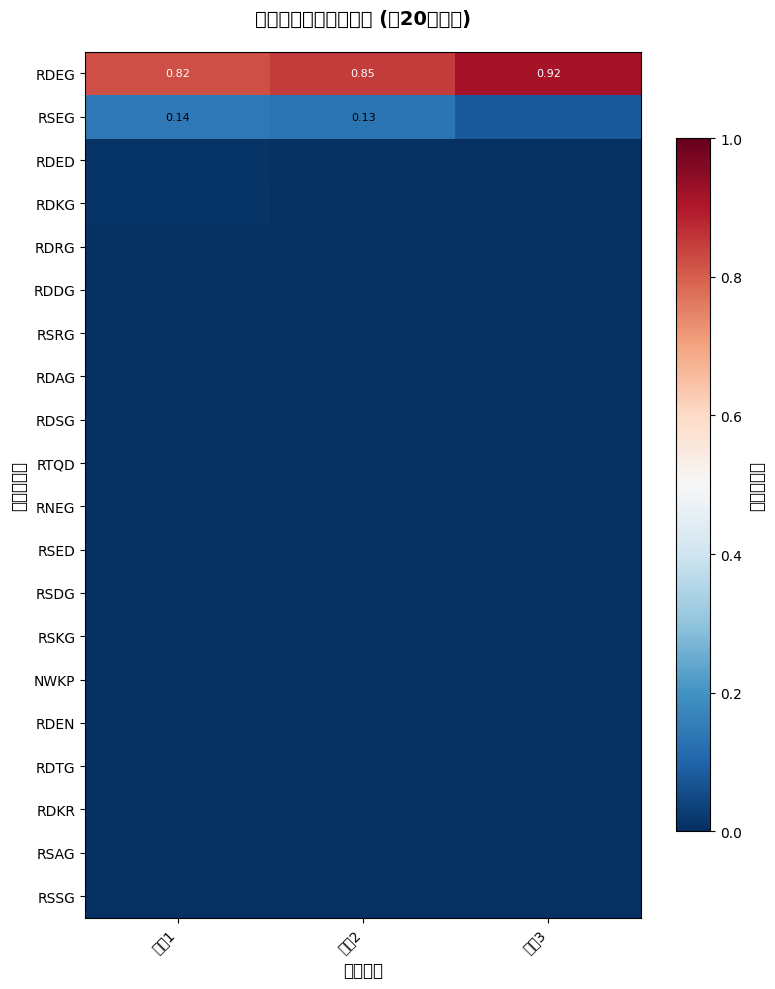

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


创建简化版热力图...


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-3061805928.py:186: UserWarning: Glyph 27688 (\N{CJK UNIFIED IDEOGRAPH-6C28}) missing from font(s) DejaVu Sans.
  plt

简化版热力图已保存到: /content/merged_amino_acid_combinations_heatmap_simple.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27688 (\N{CJK UNIFIED IDEOGRAPH-6C28}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37240 (\N{CJK UNIFIED IDEOGRAPH-9178}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas

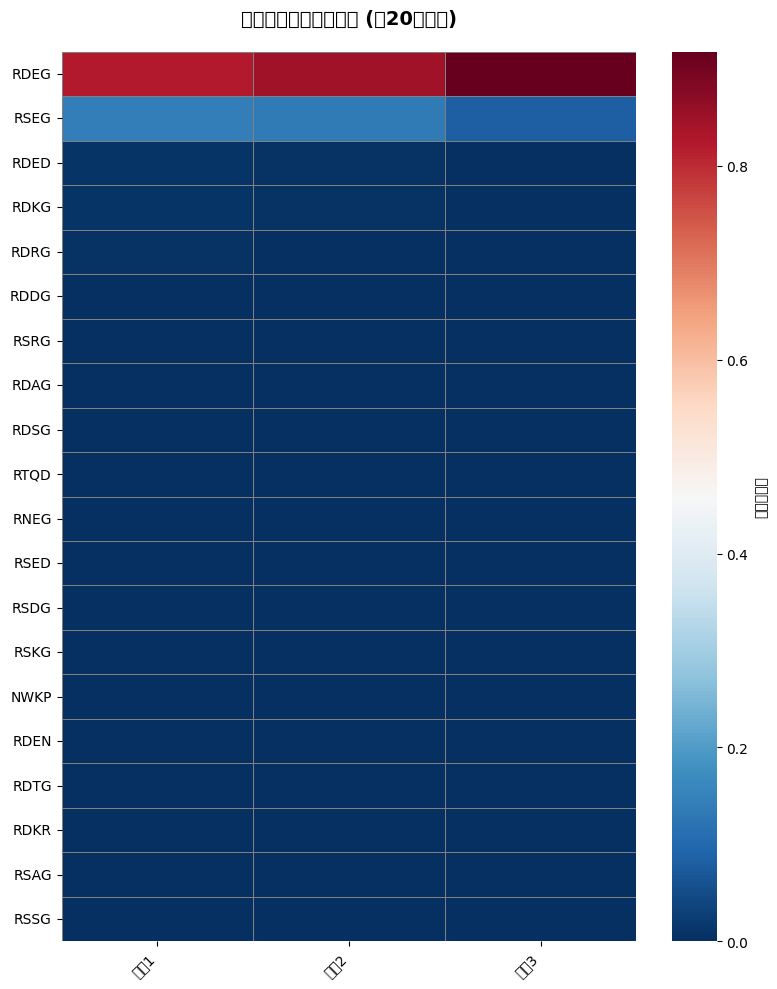

创建聚类热力图...


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/tmp/ipython-input-3061805928.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')
/tmp/ipython-input-3061805928.py:152: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches='tight')


聚类热力图已保存到: /content/merged_amino_acid_combinations_heatmap_clustered.png


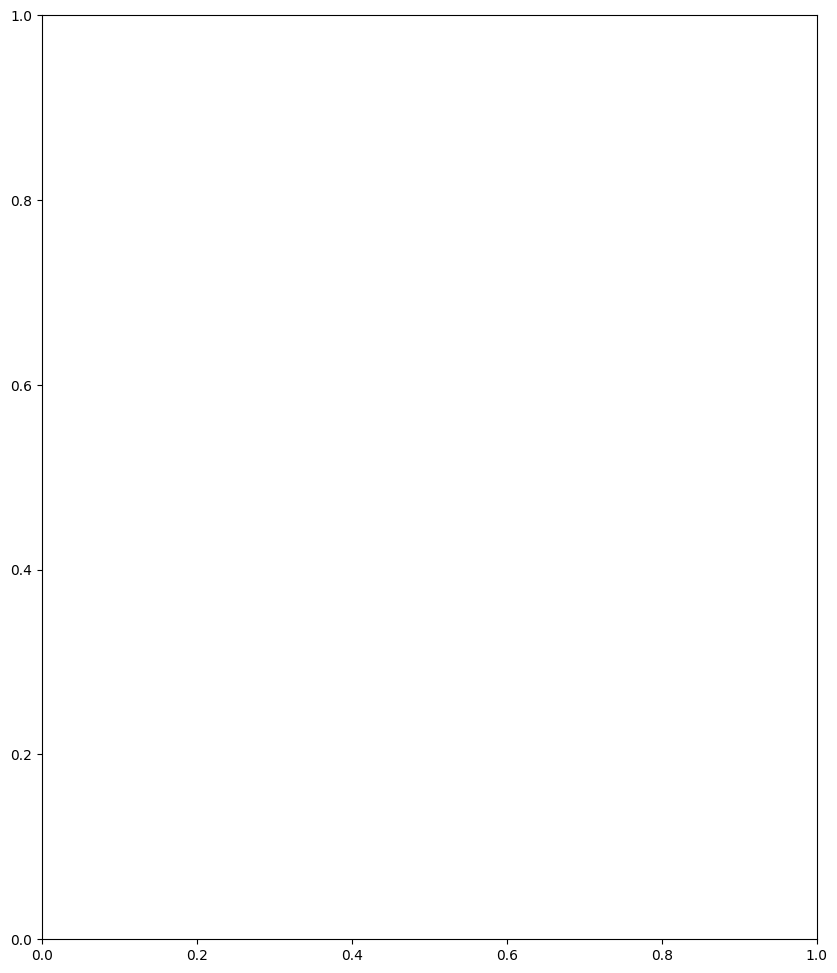

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20214 (\N{CJK UNIFIED IDEOGRAPH-4EF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


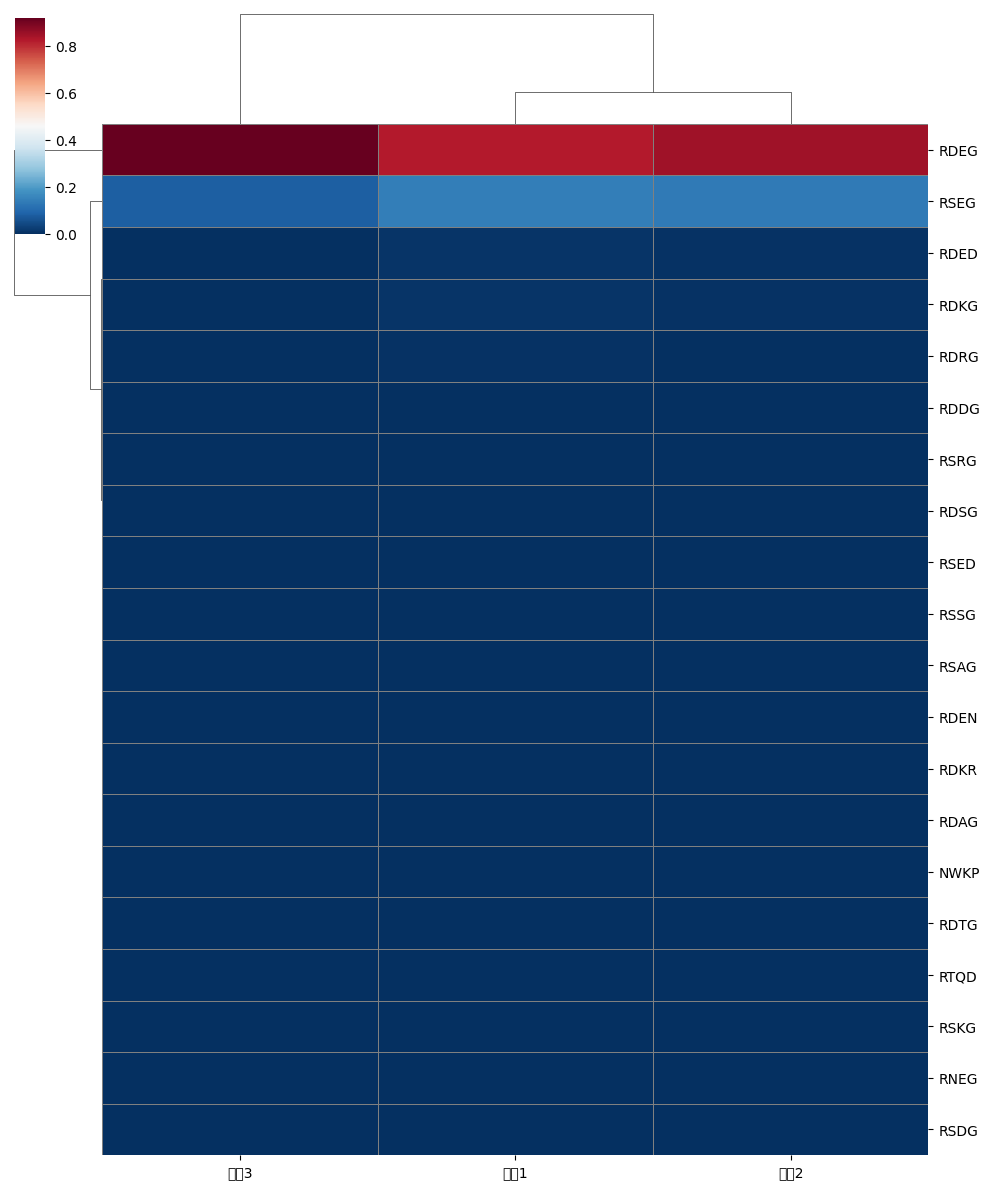


创建数据分析报告...
分析报告已保存到: /content/merged_amino_acid_combinations_analysis_report.txt

分析完成!

生成的文件列表:
  merged_amino_acid_combinations_heatmap_clustered.png
  merged_amino_acid_combinations_heatmap_simple.png
  merged_amino_acid_combinations_heatmap.png
  merged_amino_acid_combinations_analysis_report.txt

下载生成的文件:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#@title heatmap generation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial']
plt.rcParams['axes.unicode_minus'] = False

def load_and_prepare_data(csv_file, top_n=50):
    """加载合并后的CSV文件并准备数据"""
    print(f"加载数据: {os.path.basename(csv_file)}")
    df = pd.read_csv(csv_file)

    # 识别所有的count列
    count_cols = [col for col in df.columns if col.startswith('count_')]

    if not count_cols:
        print("错误: 没有找到count_开头的列")
        return None, None, None

    print(f"找到 {len(count_cols)} 个数据文件")

    # 提取组合和计数数据
    combinations = df['combination'].values

    # 提取计数数据
    count_data = df[count_cols].values.astype(float)

    # 选择总次数最高的前N个组合
    if 'total' in df.columns:
        total_counts = df['total'].values
    else:
        total_counts = np.sum(count_data, axis=1)

    # 获取前N个组合的索引
    if len(combinations) > top_n:
        top_indices = np.argsort(total_counts)[-top_n:][::-1]
    else:
        top_indices = np.arange(len(combinations))

    # 提取前N个组合的数据
    top_combinations = combinations[top_indices]
    top_count_data = count_data[top_indices, :]

    return top_combinations, top_count_data, count_cols

def normalize_data(count_data):
    """对数据进行归一化处理"""
    print("对数据进行归一化处理...")

    # 方法1: 对每列（每个文件）单独归一化，使每个文件的总和为1
    col_sums = np.sum(count_data, axis=0)

    # 避免除以0
    col_sums[col_sums == 0] = 1

    # 归一化
    normalized_data = count_data / col_sums[np.newaxis, :]

    # 方法2: 对整个数据集归一化到0-1范围（备用）
    # max_val = np.max(count_data)
    # min_val = np.min(count_data)
    # if max_val > min_val:
    #     normalized_data = (count_data - min_val) / (max_val - min_val)
    # else:
    #     normalized_data = np.zeros_like(count_data)

    return normalized_data

def create_heatmap(normalized_data, combinations, file_labels, output_path):
    """创建热力图"""
    print("创建热力图...")

    # 设置图形大小（根据数据量调整）
    fig_width = max(8, len(file_labels) * 0.8)
    fig_height = max(10, len(combinations) * 0.4)

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # 创建红-蓝渐变色
    # 'coolwarm' 是一个很好的红-蓝渐变色
    # 'RdBu_r' 是另一个红-蓝渐变色，反转了顺序
    cmap = plt.cm.RdBu_r

    # 绘制热力图
    im = ax.imshow(normalized_data, aspect='auto', cmap=cmap,
                   interpolation='nearest', vmin=0, vmax=1)

    # 设置坐标轴标签
    ax.set_xticks(np.arange(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)

    ax.set_yticks(np.arange(len(combinations)))
    ax.set_yticklabels(combinations, fontsize=10)

    # 设置标题和标签
    ax.set_title(f"氨基酸组合频次热力图 (共{len(combinations)}个组合)",
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel("数据文件", fontsize=12)
    ax.set_ylabel("氨基酸组合", fontsize=12)

    # 添加颜色条
    cbar = fig.colorbar(im, ax=ax, shrink=0.8)
    cbar.set_label('归一化频次', fontsize=12)

    # 在热力图上添加数值（如果数据不太多）
    if len(combinations) <= 30 and len(file_labels) <= 15:
        for i in range(len(combinations)):
            for j in range(len(file_labels)):
                # 只在数值较高时显示，避免图面过于拥挤
                if normalized_data[i, j] > 0.1:
                    text = f"{normalized_data[i, j]:.2f}"
                    ax.text(j, i, text, ha='center', va='center',
                           fontsize=8, color='black' if normalized_data[i, j] < 0.6 else 'white')

    plt.tight_layout()

    # 保存图形
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"热力图已保存到: {output_path}")

    plt.show()

    return fig, ax

def create_clustered_heatmap(normalized_data, combinations, file_labels, output_path):
    """创建聚类热力图"""
    print("创建聚类热力图...")

    # 创建DataFrame用于seaborn聚类热力图
    heatmap_df = pd.DataFrame(normalized_data, index=combinations, columns=file_labels)

    # 设置图形大小
    fig_width = max(10, len(file_labels) * 0.8)
    fig_height = max(12, len(combinations) * 0.4)

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # 使用seaborn绘制聚类热力图
    sns.clustermap(heatmap_df,
                   cmap='RdBu_r',
                   figsize=(fig_width, fig_height),
                   dendrogram_ratio=0.1,
                   cbar_pos=(0.02, 0.8, 0.03, 0.18),
                   linewidths=0.5,
                   linecolor='gray')

    # 保存图形
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"聚类热力图已保存到: {output_path}")

    plt.show()

def create_simple_heatmap(normalized_data, combinations, file_labels, output_path):
    """创建简化版热力图，不显示聚类"""
    print("创建简化版热力图...")

    # 创建DataFrame
    heatmap_df = pd.DataFrame(normalized_data, index=combinations, columns=file_labels)

    # 设置图形大小
    fig_width = max(8, len(file_labels) * 0.8)
    fig_height = max(10, len(combinations) * 0.4)

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # 使用seaborn绘制热力图
    sns.heatmap(heatmap_df,
                cmap='RdBu_r',
                ax=ax,
                cbar_kws={'label': '归一化频次'},
                linewidths=0.5,
                linecolor='gray',
                square=False)

    # 设置标题
    ax.set_title(f"氨基酸组合频次热力图 (共{len(combinations)}个组合)",
                 fontsize=14, fontweight='bold', pad=20)

    # 旋转x轴标签
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()

    # 保存图形
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"简化版热力图已保存到: {output_path}")

    plt.show()

    return fig, ax

def analyze_and_visualize(csv_file, top_n=50, create_all_plots=True):
    """主函数：分析和可视化合并后的CSV数据"""

    # 加载数据
    combinations, count_data, count_cols = load_and_prepare_data(csv_file, top_n)

    if combinations is None:
        print("数据加载失败")
        return

    # 准备文件标签（简化列名）
    file_labels = [col.replace('count_', '文件') for col in count_cols]

    print(f"\n数据形状: {count_data.shape}")
    print(f"组合数量: {len(combinations)}")
    print(f"文件数量: {len(file_labels)}")

    # 归一化数据
    normalized_data = normalize_data(count_data)

    # 输出基本统计信息
    print(f"\n归一化数据统计:")
    print(f"  最小值: {np.min(normalized_data):.6f}")
    print(f"  最大值: {np.max(normalized_data):.6f}")
    print(f"  平均值: {np.mean(normalized_data):.6f}")
    print(f"  中位数: {np.median(normalized_data):.6f}")

    # 创建输出目录
    output_dir = os.path.dirname(csv_file) or '.'
    base_name = os.path.splitext(os.path.basename(csv_file))[0]

    # 创建热力图
    if create_all_plots:
        # 标准热力图
        output_path1 = os.path.join(output_dir, f"{base_name}_heatmap.png")
        create_heatmap(normalized_data, combinations, file_labels, output_path1)

        # 简化版热力图
        output_path2 = os.path.join(output_dir, f"{base_name}_heatmap_simple.png")
        create_simple_heatmap(normalized_data, combinations, file_labels, output_path2)

        # 聚类热力图（如果数据量适中）
        if len(combinations) <= 100:
            output_path3 = os.path.join(output_dir, f"{base_name}_heatmap_clustered.png")
            create_clustered_heatmap(normalized_data, combinations, file_labels, output_path3)
    else:
        # 只创建简化版热力图
        output_path = os.path.join(output_dir, f"{base_name}_heatmap.png")
        create_simple_heatmap(normalized_data, combinations, file_labels, output_path)

    # 创建数据分析报告
    create_analysis_report(count_data, normalized_data, combinations, file_labels, output_dir, base_name)

    print("\n分析完成!")

def create_analysis_report(count_data, normalized_data, combinations, file_labels, output_dir, base_name):
    """创建数据分析报告"""
    print("\n创建数据分析报告...")

    # 计算每个文件的总计数
    total_counts = np.sum(count_data, axis=0)

    # 计算每个组合在所有文件中的总频次
    total_freq = np.sum(normalized_data, axis=1)

    # 找到每个文件中频次最高的组合
    top_combinations_by_file = []
    for j in range(len(file_labels)):
        max_idx = np.argmax(normalized_data[:, j])
        top_combinations_by_file.append((file_labels[j], combinations[max_idx], normalized_data[max_idx, j]))

    # 找到在所有文件中频次都较高的组合
    consistently_high_combinations = []
    for i in range(len(combinations)):
        avg_freq = np.mean(normalized_data[i, :])
        if avg_freq > 0.1:  # 平均频次超过10%
            consistently_high_combinations.append((combinations[i], avg_freq))

    # 排序
    consistently_high_combinations.sort(key=lambda x: x[1], reverse=True)
    top_combinations_by_file.sort(key=lambda x: x[2], reverse=True)

    # 保存报告
    report_path = os.path.join(output_dir, f"{base_name}_analysis_report.txt")
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write("氨基酸组合频次分析报告\n")
        f.write("=" * 50 + "\n\n")

        f.write(f"数据概览:\n")
        f.write(f"  组合总数: {len(combinations)}\n")
        f.write(f"  文件数: {len(file_labels)}\n\n")

        f.write(f"各文件总计数:\n")
        for j, label in enumerate(file_labels):
            f.write(f"  {label}: {total_counts[j]:.0f}\n")
        f.write("\n")

        f.write(f"各文件中频次最高的组合:\n")
        for label, combo, freq in top_combinations_by_file:
            f.write(f"  {label}: {combo} (频次: {freq:.4f})\n")
        f.write("\n")

        f.write(f"在所有文件中平均频次较高的组合 (前10个):\n")
        for combo, avg_freq in consistently_high_combinations[:10]:
            f.write(f"  {combo}: {avg_freq:.4f}\n")
        f.write("\n")

        f.write(f"数据统计:\n")
        f.write(f"  归一化数据最小值: {np.min(normalized_data):.6f}\n")
        f.write(f"  归一化数据最大值: {np.max(normalized_data):.6f}\n")
        f.write(f"  归一化数据平均值: {np.mean(normalized_data):.6f}\n")
        f.write(f"  归一化数据中位数: {np.median(normalized_data):.6f}\n")

    print(f"分析报告已保存到: {report_path}")

# 主程序
if __name__ == "__main__":
    # 设置您的合并后的CSV文件路径
    merged_csv_file = '/content/merged_amino_acid_combinations.csv'

    # 如果文件不存在，尝试查找最近创建的合并文件
    if not os.path.exists(merged_csv_file):
        print(f"文件 {merged_csv_file} 不存在，尝试查找其他合并文件...")
        merged_files = glob.glob('/content/*merged*.csv')

        if merged_files:
            merged_csv_file = merged_files[0]
            print(f"找到文件: {merged_csv_file}")
        else:
            print("未找到合并的CSV文件")
            print("请确保您已经运行了合并脚本，或者手动指定文件路径")

    # 设置要显示的前N个组合（按总次数排序）
    top_n_combinations = 50  # 可以调整这个值

    # 是否创建所有类型的图表
    create_all_plots = True  # 设为False只创建简化版热力图

    print("开始分析并创建热力图...")
    print("=" * 60)

    # 运行分析和可视化
    analyze_and_visualize(merged_csv_file, top_n_combinations, create_all_plots)

    # 在Colab中提供下载链接
    try:
        from google.colab import files

        # 获取所有生成的图表文件
        output_dir = os.path.dirname(merged_csv_file) or '.'
        base_name = os.path.splitext(os.path.basename(merged_csv_file))[0]

        chart_files = glob.glob(os.path.join(output_dir, f"{base_name}*.png"))
        text_files = glob.glob(os.path.join(output_dir, f"{base_name}*.txt"))

        all_files = chart_files + text_files

        if all_files:
            print("\n生成的文件列表:")
            for file in all_files:
                print(f"  {os.path.basename(file)}")

            print("\n下载生成的文件:")
            for file in all_files:
                files.download(file)
    except:
        print("\n不在Colab环境中运行，文件已保存到本地目录")